# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

**Импортируем необходимые для работы библиотеки**

In [1]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Прочитаем файл и запишем данные в перепенную data**

In [2]:
# прочитаем файл и запишем данные в переменную data
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv', sep='\t')

**Выведем на экран первые 10 строк данных**

In [3]:
pd.set_option('display.max_columns', None)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выведем основную информацию о датафрейме с помощью метода info()**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Построим общую гистограмму для всех столбцов таблицы**

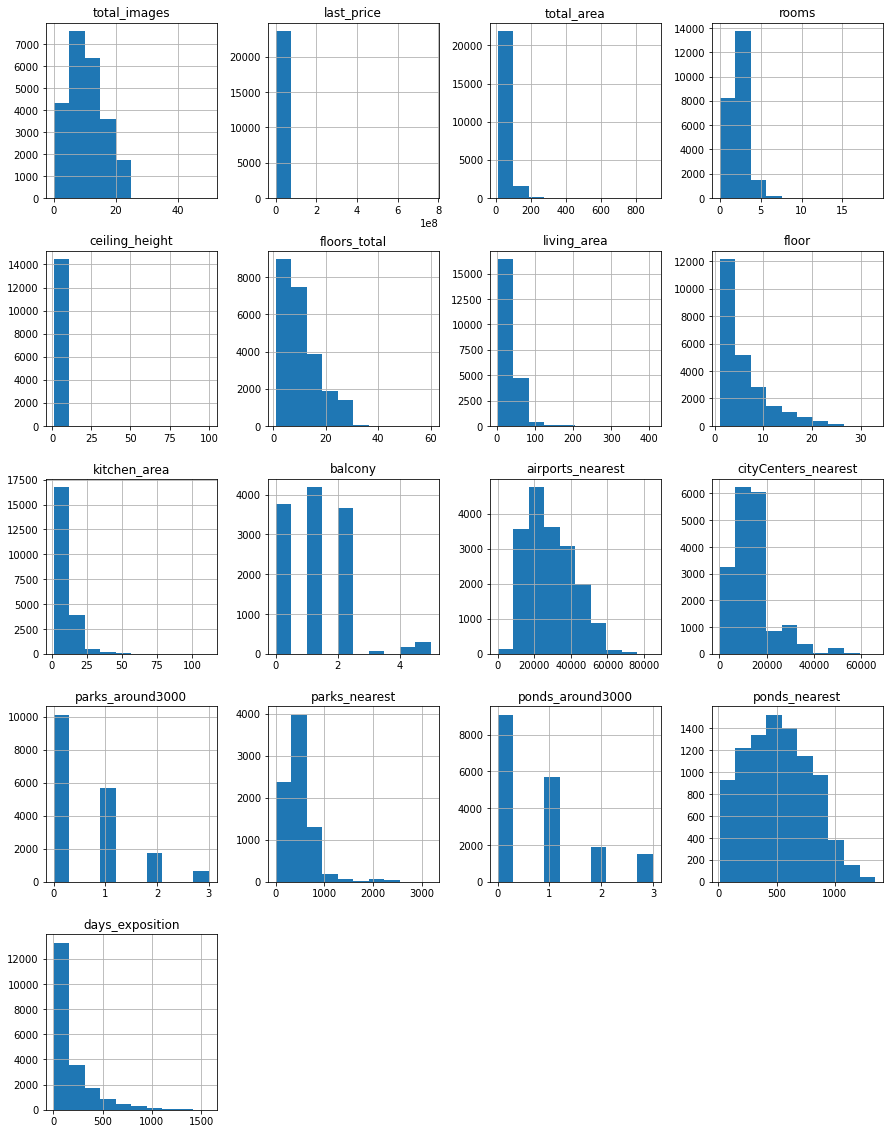

In [5]:
data.hist(figsize=(15, 20));

**Вывод:** как видно в приведённом дата сете имеются много столбцов с пропущенными значениями. Скорее всего это связано с тем, что данные не заносились пользователями, либо вносили некорректно.  Последнее объясняет в том числе и странные значения, например, высоту потолков более 10 метров, и наличие неявных дубликатов населённых пунктов,таких как "поселок городского типа" и "городской поселок". Также имеются некорректные типы данных для количественных переменных: количества балконов и пр. Для них лучше поменять тип на целочичленные.

### Предобработка данных

#### Обработка пропущенных значений

Выведем на экран информацию о пропущенных значениях используя 2 метода: isna() и sum()

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видим, что в 15 столбцах имеются пропуски.
Начнем обработку пропусков со столбца balcony. Для этого столбца пропуски, скорее всего, значат отсутствие балконов.
Поэтому можно пропущенные значения заполнить нулями

In [7]:
data['balcony'] = data['balcony'].fillna(0)

Аналогично можно поступить с данными по столбцам (заполнить пропуски нулями или значением False для булевых переменных):

- is_apartment — апартаменты (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- ponds_around3000 — число водоёмов в радиусе 3 км

In [8]:
# начнем с числа парков и водоемов в радиусе 3 км
# для этого пробежимся по столбцам, где можно пропущенные значения заменить на нули внутри цикла

for parameter in ['parks_around3000', 'ponds_around3000']:
    data[parameter] = data[parameter].fillna(0)

In [9]:
# для значения is_apartment можно заполнить также используя метод fillna()
# но можно и по другому

data['is_apartment'] = data['is_apartment'] == True

Для пропущенных значений площади кухни и жилой площади посчитаем медианное отношение площадей к общей площади и заполним пропуски

In [10]:
data['living_area'] = (
    data['living_area'].fillna(
        (data['living_area'] /data['total_area']).median() * data['total_area']
    )
)

In [11]:
data['kitchen_area'] = (
    data['kitchen_area'].fillna(
        (data['kitchen_area'] / data['total_area']).median() * data['total_area']
    )
)

Пропущенные числовые значения заменим на медианные значения:

In [12]:
'''for d in ['ceiling_height', 'floors_total']:
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в device_type текущий тип девайса (d) и есть пропуски в time 
    data[d] = data[d].fillna(data[d].median())'''

"for d in ['ceiling_height', 'floors_total']:\n    # на каждом шаге цикла с помощью атрибута loc выбираем строки,\n    # в которых в device_type текущий тип девайса (d) и есть пропуски в time \n    data[d] = data[d].fillna(data[d].median())"

In [13]:
for d in ['ceiling_height']:
    # решил оставить структуру цикла на память
    data[d] = data[d].fillna(data[d].median())

In [14]:
# заполним высоту этажа, заполнив этажом квартиры
data['floors_total'] = data['floors_total'].fillna(data['floor'])

Поменяем тип данных для количества этажей и других характеристик

Эти переменные хранят количественные данные, поэтому их лучше хранить в целочисленном виде - тип данных int

In [15]:
for parameter in ['balcony', 'floors_total', 'parks_around3000', 'ponds_around3000']:
    data[parameter] = data[parameter].astype('int')

отсутствие названий населенных пунктов заменим на 'no_name'

In [16]:
data['locality_name'] = data['locality_name'].fillna('no_name')

Проверим датасет на наличие пропущенных значений

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [18]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.600000,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.300000,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,90.289724,9,False,False,False,27.413793,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.400000,5,False,False,False,9.100000,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.600000,6,False,False,False,14.400000,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,40.658769,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.430000,26,False,False,False,8.810000,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.600000,7,False,False,False,6.500000,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


Пропущенных значений нет

#### устранены неявные дубликаты в названиях населённых пунктов

In [19]:
data['locality_name'].sort_values().unique()


array(['no_name', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'город

Заменим для начала ё на е, а затем приведем типы населенных пунктов к одинаковым значениям:

In [20]:
# создадим словарь со значениями, которые необходима заменить на унифицированные
replace_dict = {
    'поселок городского типа': 'городской поселок',
    'поселок при железнодорожной станции': 'поселок станции',
    'садоводческое некоммерческое товарищество': 'садовое товарищество',
    'садоводческое товарищество': 'садовое товарищество' 
}

In [21]:
# сначала заменим все буквы ё на е
data['locality_name'] = data['locality_name'].replace({'ё': 'е'}, regex=True)
# после этого можно приводить значения к одинаковым значениям
data['locality_name'] = data['locality_name'].replace(replace_dict, regex=True)

In [22]:
#проверим замену, не осталось ли дубликатов
data['locality_name'].sort_values().unique()

array(['no_name', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалево', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Будогощь', 'городской поселок Важины',
       'городской поселок Виллози', 'городской поселок Вознесенье',
       'городской поселок Вырица', 'городской поселок Дружная Горка',
       'городской поселок Дубровка', 'городской поселок Ефимовский',
       'городской поселок Кондратьево', 'городской поселок Красный Бо

**Вывод: Были найдены пропуски и заменены на более-менее подходящие значения**

####  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах

Проверить данные в столбце с потолками на наличие аномалий, применив ящик с усами для столбца высоты потолка

<AxesSubplot:>

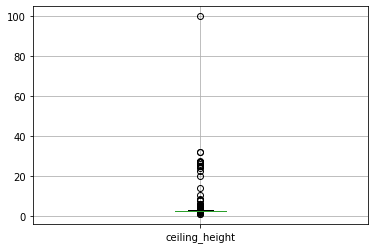

In [23]:
data.boxplot(column='ceiling_height')

видим довольно большие значения, которые больше 10, а то и 100 метров!

In [24]:
data.query('ceiling_height > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5,32.0,2,False,False,False,9.517241,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3,53.0,2,False,False,False,8.000000,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9,30.0,2,False,False,False,7.000000,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25,17.0,17,False,False,True,4.310345,2,поселок Мурино,NaN,NaN,0,NaN,0,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5,19.5,1,True,False,False,5.500000,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5,30.0,3,False,False,False,9.000000,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9,21.3,3,False,False,False,7.000000,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36,41.0,13,False,False,False,12.000000,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5,31.3,5,False,False,False,5.700000,0,Кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5,30.0,2,False,False,False,5.200000,0,Санкт-Петербург,11647.0,13581.0,0,NaN,0,NaN,NaN


In [25]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Значения больше 10 м разделим на 10, чтобы получить корректные значения высоты верхнего этажа

In [26]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10

удалим те значения, которые в итоге получились меньше 1,5 м и больше 3 м

In [27]:
data = data.query('ceiling_height > 1.5 and ceiling_height < 3')

Проверим получившиеся значения для высоты потолков:

In [28]:
data['ceiling_height'].describe()

count    21076.000000
mean         2.633928
std          0.088946
min          1.750000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.990000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

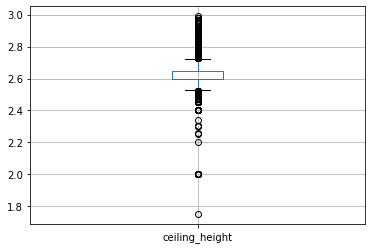

In [29]:
data.boxplot(column='ceiling_height')

Несмотря на то, что есть значения за усами графика, все таки встречаются квартиры с высотой потолков и меньше 1,8 и больше 2,8 м, так что считаю, что все в порядке, можно продолжать убирать аномалии в других столбцах.

Проверим на примере жилой площади. Выведем описание значений для этого столбца:

In [30]:
data['living_area'].describe()

count    21076.000000
mean        31.922294
std         18.059455
min          2.000000
25%         18.400000
50%         29.300000
75%         40.000000
max        409.700000
Name: living_area, dtype: float64

Удалим выбросы для столбцов для стоимости квартиры, общей площади и количества комнат:

In [31]:
for column in ['last_price', 'total_area', 'rooms']:
    data = data[(data[column] >= data[column].quantile(0.01)) & (data[column] <= data[column].quantile(0.99))]

Ещё раз выведем описание для жилой площади:

In [32]:
data['living_area'].describe()

count    20048.000000
mean        30.519320
std         12.974935
min          3.000000
25%         18.500000
50%         29.000000
75%         39.100000
max         99.700000
Name: living_area, dtype: float64

**Аномальные значения удалились! Переходим к анализу данных!**

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем стоимость квадратного метра и добавим значения в таблицу

In [33]:
data['cost_of_squere_meter'] = data['last_price'] / data['total_area']

Преобразуем строковые значения даты

In [34]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Добавим в таблицу день публикации объявления

In [35]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
5   2018-09-10
6   2017-11-02
Name: first_day_exposition, dtype: datetime64[ns]

In [36]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Добавим месяц публикации объявления

In [37]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Добавим год публикации объявления

In [38]:
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим столбец с типом этажа квартиры. Для этого создадим функцию категоризации и применим её к нашему датафрейму

In [39]:
def type_of_floor(row):

    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'


In [40]:
data['type_of_floor'] = data.apply(type_of_floor, axis=1)

посчитаем и добавим в таблицу: расстояние в км до центра города

In [41]:
data['city_centers_nearest_km'] = (data['cityCenters_nearest']/1000).round(0)

In [42]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_of_squere_meter,weekday_exposition,month_exposition,year_exposition,type_of_floor,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,другой,19.0


### Проведите исследовательский анализ данных

Построим диаграммы для каждого параметра

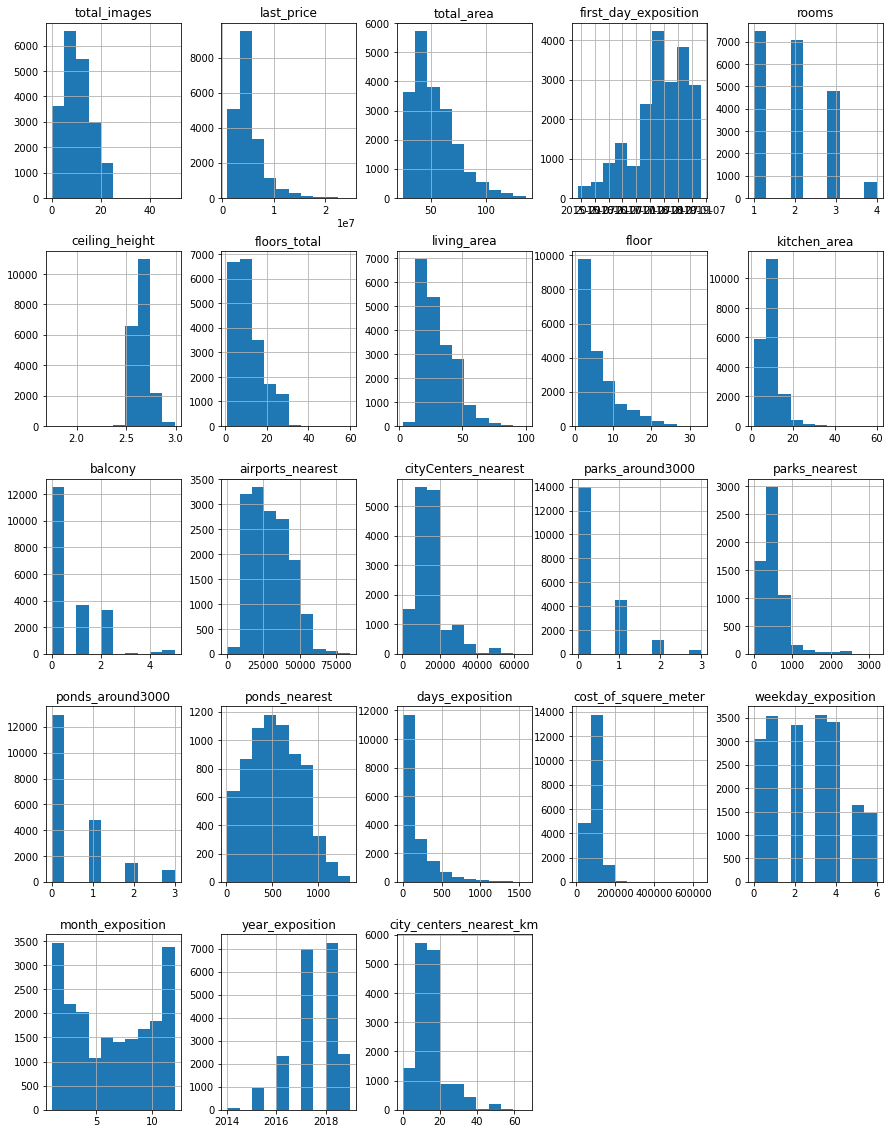

In [43]:
data.hist(figsize=(15, 20));

Построим отдельные гистограммы для каждого столбца
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

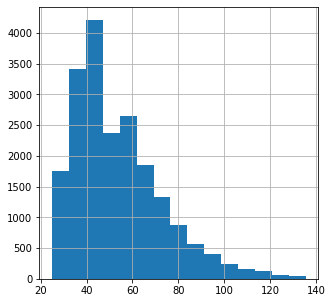

In [44]:
# общая площадь
data['total_area'].hist(figsize=(5, 5), bins=15);

*Распределение площадей квартир похоже на распределение Пуассона с пиком в 40-50 кв. м. Квартиры больше 80 кв.м уже гораздо меньше.*

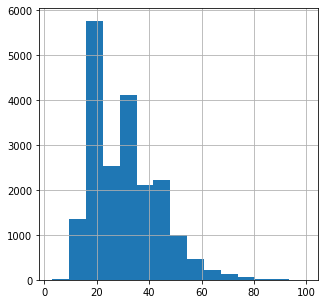

In [45]:
# жилая площадь
data['living_area'].hist(figsize=(5, 5), bins=15);

*Распределение жилой площади квартир по форме дублирует значения общей площади квартиры - не удивительно, чем больше сама квартира, тем, скорее всего, и больше жилая площадь. Предполагаю, что и площадь кухни будет аналогична.*

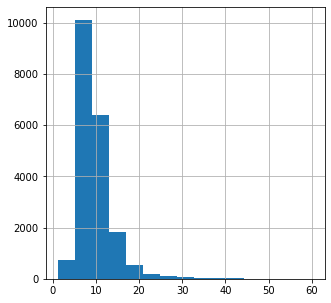

In [46]:
# площадь кухни
data['kitchen_area'].hist(figsize=(5, 5), bins=15);

*Все таки гистограмма площади кухни немного отличается от общей и жилой площади. Логично, ведь не обязательно увеличивать площадь кухни пропорционально общей площади квартиры и делать из неё "столовую"*

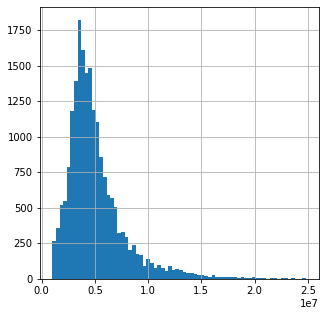

In [47]:
# цена квартиры
data['last_price'].hist(figsize=(5, 5), bins=70);

*Стоимость квартир также похоже на распределение Пуассона с пиком  стоимости 4 млн руб.
Квартиры дороже 10 млн.  рубл.встречаются гораздо меньше.*

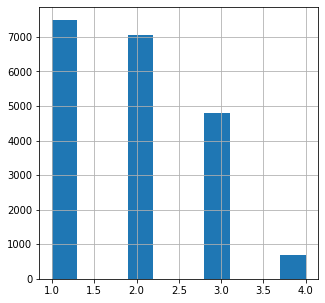

In [48]:
# количество комнат;
data['rooms'].hist(figsize=(5, 5));

*больше всего на рынке - однушек, чуть меньше 2-шек. квартир с 4мя комнатами уже гораздо меньше, чем остальных.*

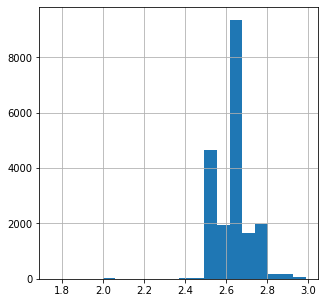

In [49]:
# высота потолков;
data['ceiling_height'].hist(figsize=(5, 5), bins=20);

*квартир с высотой потолков от 2,5 до 2,8 в районе Санкт-Петербурга больше всего. Питер - город широких парадных и высоких потолков )*

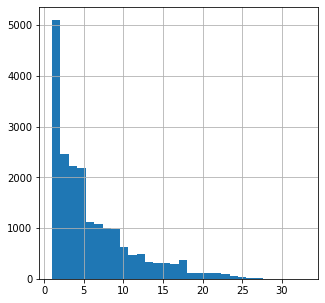

In [50]:
# этаж квартиры;
data['floor'].hist(figsize=(5, 5), bins=30);

*больше всего квартир продают до 5ого этажа - много домов с высотностью в 5 этажей. Дальше идет "провал". Следующий резкий спад - на 9 этажах - тоже связано с типовыми домами в 9 этажей.*

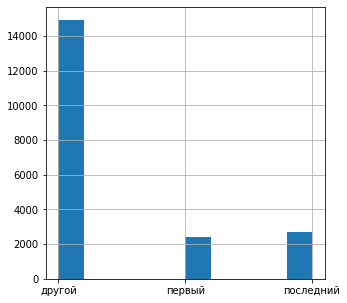

In [51]:
# тип этажа квартиры («первый», «последний», «другой»);
data['type_of_floor'].hist(figsize=(5, 5));

*Видим, что первых и последних этажей почти одинаковое количество на рынке, а других (промежуточных) гораздо больше, что соответствует здравой логике*

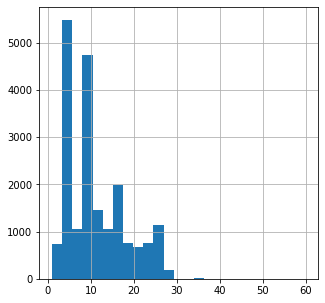

In [52]:
# общее количество этажей в доме;
data['floors_total'].hist(figsize=(5, 5), bins=25);

*видим пики на 5, 9 и 15 этажах - стандартные высоты домов. Коррелирует с гистограммой этажа квартир*

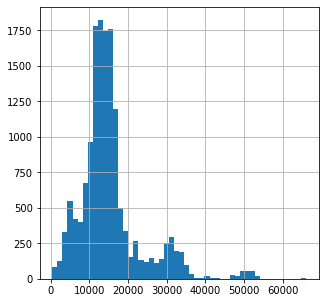

In [53]:
# расстояние до центра города в метрах;
data['cityCenters_nearest'].hist(figsize=(5, 5), bins=50);

*самый большой пик - от 10 до 20 км от центра - самая плотная застройка жилых домов в СПб*

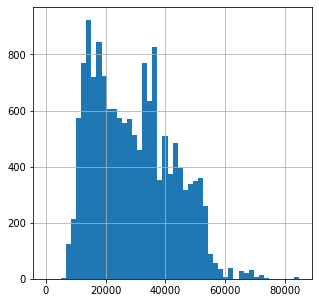

In [54]:
# расстояние до ближайшего аэропорта;
data['airports_nearest'].hist(figsize=(5, 5), bins=50);

*рядом с аэропортом ожидаемо жилых построек нет. Все остальные квартиры располагаются от ~10 км ~55 км. С пиками, так, где по расстоянию находятся крупные населенные пункты.*

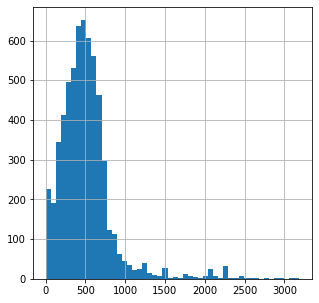

In [55]:
# расстояние до ближайшего парка;
data['parks_nearest'].hist(figsize=(5, 5), bins=50);

*Парков в городах много - не так далеко от большинства представленных объявлений*

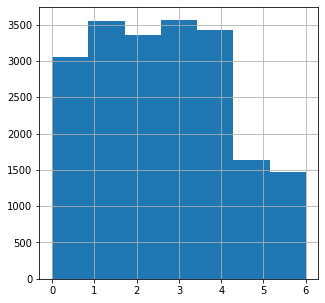

In [56]:
# день публикации объявления
data['weekday_exposition'].hist(figsize=(5, 5), bins=7);

*в выходные дни объявления выставляют гораздо меньше, чем в будни - агенства по недвижимости работают не каждый день*

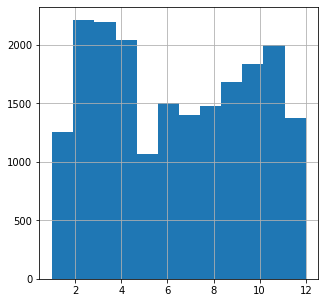

In [57]:
# месяц публикации объявления
data['month_exposition'].hist(figsize=(5, 5), bins=12);

*в январе, как и во всей стране, продаж почти нет - все отходят от новогодних праздников. В мае июне начинается отпусной период, который, потихоньку, заканчивается в августе, что и сказывается на количестве публикаций объявлений*

Первое, что попалось на глаза, видя из графиков - большие значения для средних величин. Видимо, это обусловлено заменой пустых значений на медианные для тех параметров, где этого лучше не делать.

Большая часть распределений похожи на распределения Пуассона: Стоимость, площадь, этаж, время выставлени на продажу.

График по количеству комнат получился не очень - попробуем его перестроить.

<AxesSubplot:>

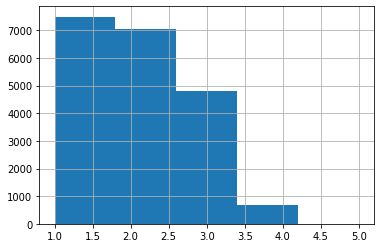

In [58]:
#

data['rooms'].hist(bins=5, range = (1, 5))

Из этого гистограммы более понятно, что больше всего квартир на продажу с одной и двумя комнатами, а с 5 комнатами совсем немного.

#### Изучим столбец с типом этажа квартиры

In [59]:
data['type_of_floor'].value_counts()

другой       14936
последний     2689
первый        2423
Name: type_of_floor, dtype: int64

In [60]:
data['type_of_floor'].describe()

count      20048
unique         3
top       другой
freq       14936
Name: type_of_floor, dtype: object

<AxesSubplot:>

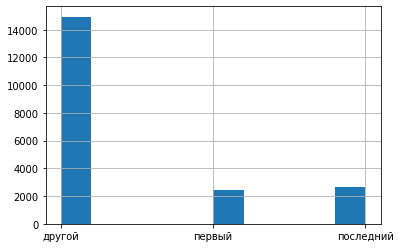

In [61]:
data['type_of_floor'].hist()

Видим, что первых и последних этажей почти одинаковое количество, , а других (промежуточных) гораздо больше, что соответствует здравой логике

#### Изучим, как быстро продавались квартиры (столбец days_exposition)

Для начала построим гистограмму

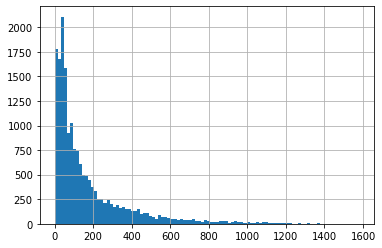

In [62]:
data['days_exposition'].hist(bins=100);

Выведем значения для средних арифметических и медианных величин

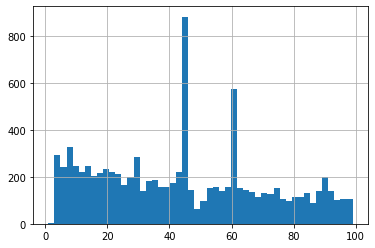

In [63]:
#построим гистограмму для значени меньше 100 дней
data.loc[data['days_exposition'] < 100, 'days_exposition'].hist(bins=50);

*На графике видим 2 значительных пика - на 45 день и на 60й. Возможно, это связано с тем, что бесплатное размещение объявлений допускается на 45 и на 60 дней на разных ресурсах? После чего объявление снималось с продажи и регистрировалось новое*

In [64]:
data['days_exposition'].describe()

count    17629.000000
mean       171.705599
std        209.316360
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

Можно сделать вывод, что быстрыми продажами квартиры можно считать те, которые продавались за несколько дней. Долгими - больше 200 дней, т.е. более 3х месяцев.

Так, есть продажи, которые были осуществлены меньше недели после публикации, а есть и те, которые продавались больше года - такие продажи назовем экстремально долгими. Видимо, первый этаж, которые далеко от центра и парков, и рядом с аэропортами :)

#### Теперь узнаем, какие факторы больше всего влияют на общую стоимость

Посмотрим графики 

Постром графики, которые покажут зависимость цены от указанных ниже параметров.

        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);

parameters = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_of_floor', 'weekday_exposition', 'month_exposition', 'year_exposition']


Text(0, 0.5, 'Стоимость квартиры')

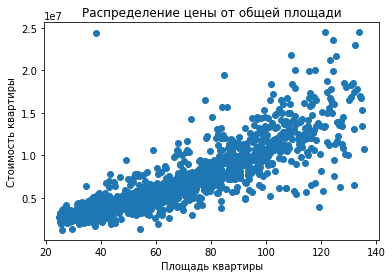

In [65]:
data_pivot = data.pivot_table(index='total_area', values='last_price')

plt.scatter(x=data_pivot.index, y=data_pivot['last_price'])
plt.title('Распределение цены от общей площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

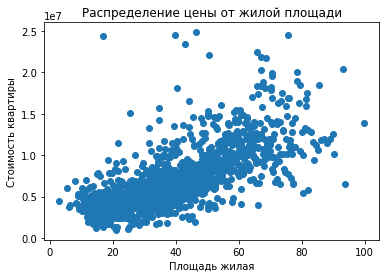

In [66]:
data_pivot = data.pivot_table(index='living_area', values='last_price')

plt.scatter(x=data_pivot.index, y=data_pivot['last_price'])
plt.title('Распределение цены от жилой площади')
plt.xlabel('Площадь жилая')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

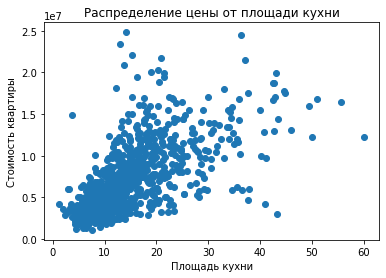

In [67]:
data_pivot = data.pivot_table(index='kitchen_area', values='last_price')

plt.scatter(x=data_pivot.index, y=data_pivot['last_price'])
plt.title('Распределение цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

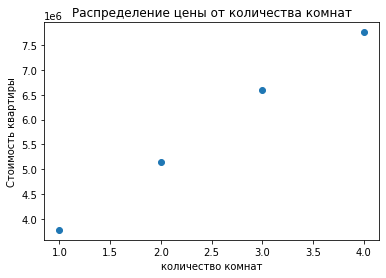

In [68]:
data_pivot = data.pivot_table(index='rooms', values='last_price')

plt.scatter(x=data_pivot.index, y=data_pivot['last_price'])
plt.title('Распределение цены от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

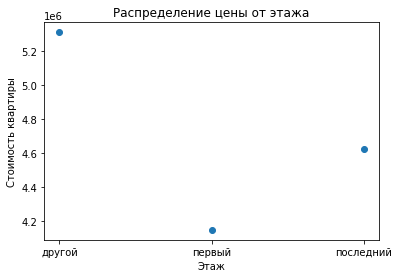

In [69]:
data_pivot = data.pivot_table(index='type_of_floor', values='last_price')

plt.scatter(x=data_pivot.index, y=data_pivot['last_price'])
plt.title('Распределение цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

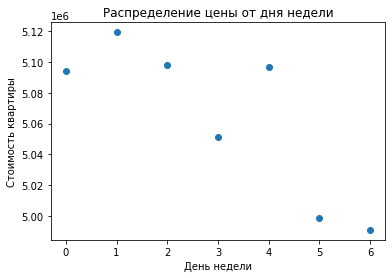

In [70]:
data_pivot = data.pivot_table(index='weekday_exposition', values='last_price')

plt.scatter(x=data_pivot.index, y=data_pivot['last_price'])
plt.title('Распределение цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

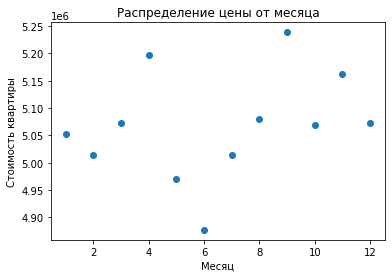

In [71]:
data_pivot = data.pivot_table(index='month_exposition', values='last_price')

plt.scatter(x=data_pivot.index, y=data_pivot['last_price'])
plt.title('Распределение цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры')

Text(0, 0.5, 'Стоимость квартиры')

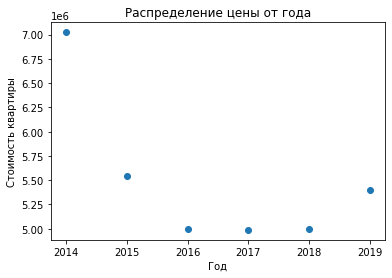

In [72]:
data_pivot = data.pivot_table(index='year_exposition', values='last_price')

plt.scatter(x=data_pivot.index, y=data_pivot['last_price'])
plt.title('Распределение цены от года')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')

**Вывод: Стоимость квартиры зависит от исследуемых факторов следующим образом:**
- чем больше общая и жилая площадь квартиры, тем цена больше
- площадь кухни также влияет на стоимость квартиры, но для больших площадей кухни - больший разброс по стоимости, т.к. квартиры с большой площадью кухни могут быть в разном сегменте по статусу жилья.
- чем больше комнат, тем дороже квартира. если больше 5, то квартиры такого сегмента относятся скорее всего к премиум классу - их стоимость существенно выше
- Логично, что на первом этаже квартиры самые дешевые, на последнем - чуть дороже, но также существенно дешевле промежуточных этажей.
- Видим, что когда в восресенье публикуются объявления, то такие квартиры самые дешевые. В эти дни, скорее всего, объявления публикуют частные лица, которым надо продать квартиры в срочном порядке - цена у таких квартир, соответственно, ниже
- самые дешевые квартиры - в июне, когда покупательская способность у людей меньше, а деньги нужны больше (люди уезжают в отпуска)
- спад стоимости квартир пришелся на 16-18е года, когда стоимость ипотеки существенно возросла, в эти годы выгодно было брать квартиры, но с определенными рисками, если брать в кредит

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [73]:
data_pivot = (
    data.pivot_table(index='locality_name', values='cost_of_squere_meter', aggfunc=['count', 'mean'])
)
data_pivot.columns = ['cost_count', 'cost_mean']
data_pivot = data_pivot.sort_values(by='cost_count', ascending=False).iloc[:10]


In [74]:
data_pivot

,cost_count,cost_mean
locality_name,,
Санкт-Петербург,12806,107362.209681
поселок Мурино,506,84762.501607
поселок Шушары,429,78215.861967
Всеволожск,379,68367.909458
поселок Парголово,322,90448.423806
Колпино,317,75377.263013
Пушкин,317,101308.908318
Гатчина,285,68838.838196
деревня Кудрово,275,92226.972772


In [75]:
display(data_pivot.query('cost_mean == cost_mean.min()'))

,cost_count,cost_mean
locality_name,,
Выборг,205,57738.001825


In [76]:
display(data_pivot.query('cost_mean == cost_mean.max()'))

,cost_count,cost_mean
locality_name,,
Санкт-Петербург,12806,107362.209681


**Самые дорогие квартиры - в культурной столице Санкт-Петербурга - это логично.
А Выборг из 10тки лучших - со стоимостью квартир в 2 раза меньше, чем с Санкт-Петербурге. При переезде из Москвы в Северную Столицу надо будет учесть этот факт.**

#### Ранее посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра.

<AxesSubplot:xlabel='city_centers_nearest_km'>

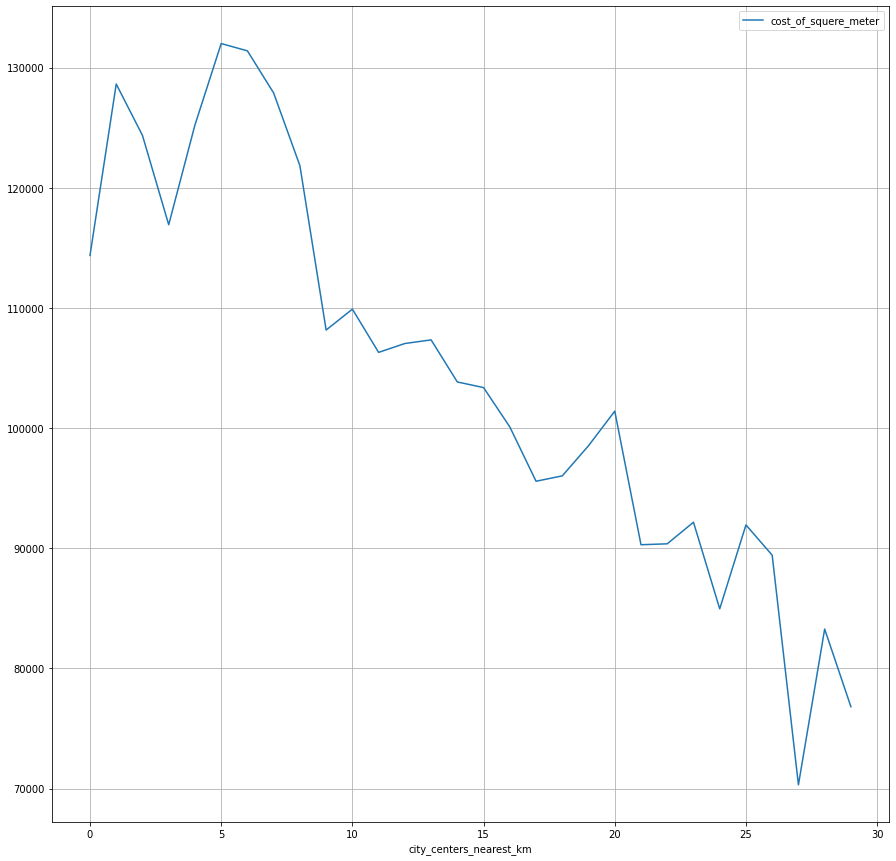

In [77]:
data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='city_centers_nearest_km', values='cost_of_squere_meter')\
    .plot(y = 'cost_of_squere_meter', figsize=(15,15), grid=True)

***Ожидаемо, что чем дальше от центра города, тем меньше стоимость квадратного метра квартиры. Самые догорие те, которые находятся в пешей доступности от центра. Эти квартиры можно будет в последствие сдавать для туристов***

### Общий вывод

Для анализа рынка недвижимости (квартир) в Санкт-Петербурге и соседних населённых пунктов были получены данные сервиса Яндекс.Недвижимость - архив объявлений о продаже за несколько лет (заполнена в ручную и автоматически для географических значений).

Данные были обработаны и исправлены: определены пропущенные значения и заполнены, где это представлялось возможным (наличие балконов, высота потолков); преобразованы типы данных для значений, где это было необходимо (количество балконов, парков в радиусе 3000 м и др.); исправлены данные, где, например, указаны неверные данные по высотам потолков); идалены неявные дубликаты населенных пунктов; удалены аномальные значения, которые не превышают 10% от всего датасета.
Также к набору данных были расчитаны и добавлены столбцы со следующими значениями:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

После этого был произведен анализ данных и стоимости квартир от различных параметров, построены гистограммы и сделаны следующие закономерности:
Больше всего на рынке представлены квартиры в 5ти и 9ти этажных домах.

Чем больше площадь квартиры (общая и/или жилая) - тем больше стоимость. Площадь кухни не так линейно влияет на стоимость квартиры, но определенная зависимость также прослеживается.
Чем ближе квартира к центру - тем она дороже.
Квартиры на первом этаже выставлены на продажу меньше всего, их стоимость также ниже, чем у квартир на верхнем этаже и существенно ниже, чем на средних этажах.

Объявления реже всего выставлялись в выходные дни (скорее всего - частные продавцы по цене ниже, чем в другие дни).
В начале года и в середине - период каникул и отпусков, цены также ниже на квартиры, чем в другие периоды года.

В период с 2016 по 2018 гг, когда ипотечное кредитование было дорогим, цены на квартиры были гораздо ниже, чем до и после этого периода.
